<a href="https://colab.research.google.com/github/Quantum00000/Machine_Learning_And_AI/blob/main/Decision_Tree_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("weatherAUS.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.dropna(subset=["RainTomorrow","RainToday"],inplace=True)

In [5]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
year=pd.to_datetime(df.Date).dt.year

In [7]:
train=df[year<2015]
val=df[year==2015]
test=df[year>2015]

In [8]:
input_cols=list(df.columns)[1:-1]
target_col=df.columns[-1]

In [9]:
train_input=train[input_cols].copy()
train_target=train[target_col].copy()

In [10]:
val_input=val[input_cols].copy()
val_target=val[target_col].copy()

In [11]:
test_input=test[input_cols].copy()
test_target=test[target_col].copy()


In [12]:
numerical_cols=df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols=df[input_cols].select_dtypes(object).columns.tolist()

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer=SimpleImputer(strategy="mean")

In [15]:
imputer.fit(df[numerical_cols])

SimpleImputer()

In [16]:
train_input[numerical_cols]=imputer.transform(train_input[numerical_cols])
val_input[numerical_cols]=imputer.transform(val_input[numerical_cols])
test_input[numerical_cols]=imputer.transform(test_input[numerical_cols])

In [17]:
train_input[categorical_cols]=train_input[categorical_cols].fillna('unknown')
val_input[categorical_cols]=val_input[categorical_cols].fillna('unknown')
test_input[categorical_cols]=test_input[categorical_cols].fillna('unknown')

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
scaler.fit(df[numerical_cols])

MinMaxScaler()

In [21]:
train_input[numerical_cols]=scaler.transform(train_input[numerical_cols])
val_input[numerical_cols]=scaler.transform(val_input[numerical_cols])
test_input[numerical_cols]=scaler.transform(test_input[numerical_cols])

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [24]:
encoder.fit(df[categorical_cols].fillna('unknown'))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [25]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [26]:
train_input[encoded_cols]=encoder.transform(train_input[categorical_cols])
val_input[encoded_cols]=encoder.transform(val_input[categorical_cols])
test_input[encoded_cols]=encoder.transform(test_input[categorical_cols])

/tmp/ipython-input-3187618878.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoded_cols]=encoder.transform(train_input[categorical_cols])
/tmp/ipython-input-3187618878.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoded_cols]=encoder.transform(train_input[categorical_cols])
/tmp/ipython-input-3187618878.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model=DecisionTreeClassifier()

In [29]:
model.fit(train_input[numerical_cols + encoded_cols],train_target)

DecisionTreeClassifier()

In [30]:
pred=model.predict(val_input[numerical_cols + encoded_cols])

In [31]:
pred

array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,val_target)

0.7942536134355433

# **Performing Hyperparameter in Decision Tree**

**1-Max Depth**

In [33]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(train_input[numerical_cols+encoded_cols],train_target)
  train_error =1- model.score(train_input[numerical_cols+encoded_cols],train_target)
  val_error=1-model.score(val_input[numerical_cols+encoded_cols],val_target)
  return {'Max Depth' :md ,'Training Error':train_error, 'Validation Error': val_error}

In [34]:
errors_df =pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [35]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154602
7,8,0.144814,0.153842
8,9,0.139435,0.154544
9,10,0.131802,0.154778


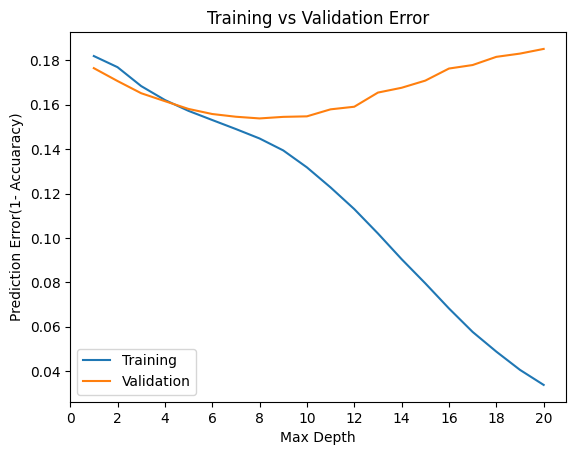

In [36]:
plt.figure()
plt.plot(errors_df['Max Depth'],errors_df['Training Error'])
plt.plot(errors_df['Max Depth'],errors_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error(1- Accuaracy)')
plt.legend(['Training','Validation'])

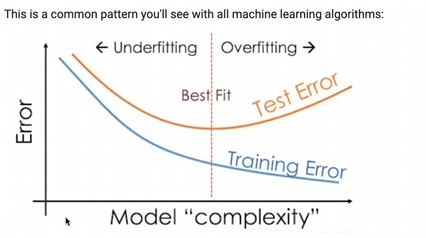

In [37]:
model =DecisionTreeClassifier(max_depth=8,random_state=42).fit(train_input[numerical_cols+encoded_cols],train_target)
model.score(train_input[numerical_cols+encoded_cols],train_target),model.score(val_input[numerical_cols+encoded_cols],val_target)

(0.8551863493488998, 0.8461583474749839)

**2-Max_leaf_nodes**

In [38]:
model=DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)

In [39]:
model.fit(train_input[numerical_cols+encoded_cols],train_target)


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [40]:
model.score(train_input[numerical_cols+encoded_cols],train_target)

0.852696248520227

In [41]:
model.score(val_input[numerical_cols+encoded_cols],val_target)

0.8471531394464276

In [42]:
model.tree_.max_depth

11

There are more parameter which are tuned for better results

Another method is cost-complexity pruning

# **Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier(n_jobs=-1,random_state=42)

In [45]:
model.fit(train_input[numerical_cols+encoded_cols],train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [46]:
model.score(train_input[numerical_cols+encoded_cols],train_target)

0.9999693840062048

In [47]:
model.score(val_input[numerical_cols+encoded_cols],val_target)

0.8567499561121189

The genral technique of combining the results of many models is called 'ensembling'.it works because most errors of individual models cancel out an averaging.

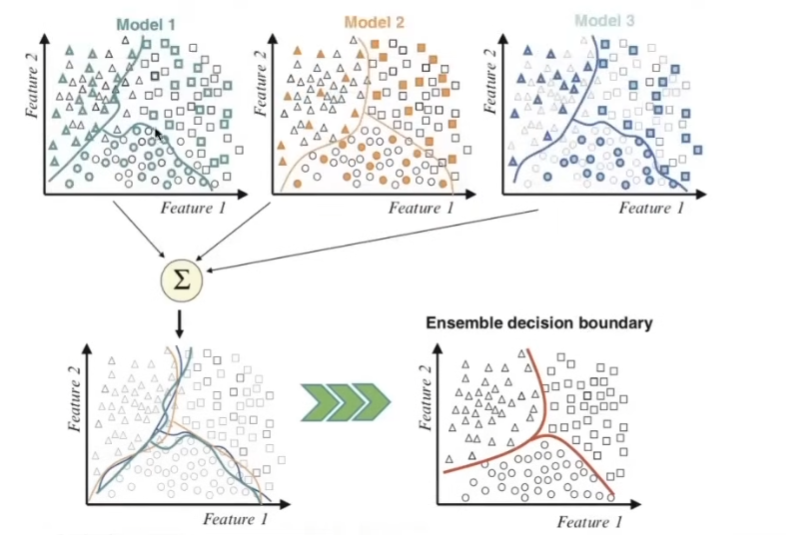

Estimators :- This tells us the number of decision tree created

In [48]:
len(model.estimators_)

100

Here we have 100 decision tree are working

Whole Random Forest have better val accuracy than any individual decision tree accuracy

Note- Random Forest assign importance(numerical value) to each feature , from each individual tree combining all the importance it estimate which feature is most important.

# **Hyperparameter Tuning with random Forest**

**n-estimators :- Bring randomness in dataset**

In [49]:
 model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=100)

In [50]:
model.fit(train_input[numerical_cols+encoded_cols],train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [51]:
model.score(train_input[numerical_cols+encoded_cols],train_target)

0.9999693840062048

In [52]:
model.score(val_input[numerical_cols+encoded_cols],val_target)

0.8567499561121189

**2-max_depth and max_leaf_node**

In [53]:
def test_prams(**params):
  model =RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(train_input[numerical_cols+encoded_cols],train_target)
  return model.score(train_input[numerical_cols+encoded_cols],train_target),model.score(val_input[numerical_cols+encoded_cols],val_target)

In [54]:
test_prams(max_depth=5)

(0.8219067640935624, 0.8261454736965299)

In [55]:
test_prams(max_depth=26)

(0.9826713475119402, 0.8574521622096085)

In [56]:
test_prams(max_leaf_nodes=2**5)

(0.8319488100583745, 0.8348645327403593)

In [57]:
test_prams(max_leaf_nodes=2**20)

(0.9999693840062048, 0.8565158874129557)

Max_feature-It allow Random forest to choose n number of random features column as input for different Decision trees

In [58]:
test_prams(max_features=20)

(0.9999795893374699, 0.8571595763356545)

min_samples_split and min_sample_leaf

min_sample_split--Allows to split node into min n number of nodes

min_sample_leaf--Allows to have min n number of leaf

In [59]:
test_prams(min_samples_split=5,min_samples_leaf=2)

(0.9570763766991877, 0.8553455439171397)

min_impurity_decrease

It is used to control the split by spplying condition that split should induce a descrease of the impurity(Gini index) greater then or equal to a value.

In [65]:
test_prams(min_impurity_decrease=1e-8)

(0.9999795893374699, 0.8581543683070981)

In [63]:
test_prams(min_impurity_decrease=1e-2)

(0.7775441890843777, 0.7906255485985136)

Bootstrap ,max_samples

Bootstrap--A random forest doestn't use the entire dataset for training each descision tree.Instead it applies a technique called bootstrapping. for eachtree rows from the dataset are picked one by one randomly, with replacement i.e some rows may not show up at all, while some rows may show up multiple times

In [66]:
test_prams(bootstrap=False)

(0.9999795893374699, 0.8579202996079349)

max_sample--it allow us to choose maximum how much sample size should be used

Class Weight-- It allow us to provide weight to classes of the target

In [67]:
model.classes_

array(['No', 'Yes'], dtype=object)

so we have two classes "Yes" and "No"

In [69]:
test_prams(class_weight='balanced')

(0.9999795893374699, 0.8558721984902569)

In [70]:
test_prams(class_weight={'No':1,'Yes':2})

(0.9999693840062048, 0.8557551641406753)

Now Lets apply different hyperparameters tuning together

In [71]:
model=RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    n_estimators=500,
    max_features=20,
    max_depth=30,
    class_weight={'No':1,'Yes':1.5}

)

In [72]:
model.fit(train_input[numerical_cols+encoded_cols],train_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [73]:
model.score(train_input[numerical_cols + encoded_cols],train_target)

0.9993366534677716

In [75]:
model.score(val_input[numerical_cols+encoded_cols],val_target)

0.8569255076364913

In [76]:
model.score(test_input[numerical_cols+encoded_cols],test_target)

0.8467911318553092